## Alessandro Bianchetti

## Exercise 7

Consider a bivariate Gaussian distribution N($\mu$,$\Sigma$), where $\mu$ = (4, 2),
$\Sigma_{11}$ = 1.44, $\Sigma_{22}$ = 0.81, $\Sigma_{12}$ = $\Sigma_{12}$ = −0.702. Assume that such distribution
describes the posterior of two parameters $X_1$ and $X_2$. Plot contours
of this distribution and tell what are the boundaries of the 95\% credibile
interval for each parameter, after marginalizing over the other. Tell how
these boundaries change if, instead of marginalizing, we fix either parameter
to a known value. Now, re-obtain the same boundaries via Monte
Carlo sampling of the posterior, in three ways: a) by directly drawing values
of ($X_1$,$X_2$), by mean of a a Cholesky decomposition of the covariance
(check in the literature how to do this); b) Via Metropolis-Hastings sampling
of the posterior, c) Via Gibbs sampling of the posterior. In all cases,
do not rely on pre-made code, but write your own (i.e., you can surely
use libraries to generate known distributions, do Cholesky decomposition,
and so on, but you should not use a pre-made library with a command like
”Gibbs-sampling”). In all cases, provide final contour plots, and marginalized
posteriors. In the MCMC analysis, produce also trace plots to test
for convergence of the chains. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import random, seed
from scipy.stats import multivariate_normal as mvn

#plt.rcParams['axes.xmargin'] = 0
#plt.rcParams['axes.ymargin'] = 0
%matplotlib inline

No handles with labels found to put in legend.


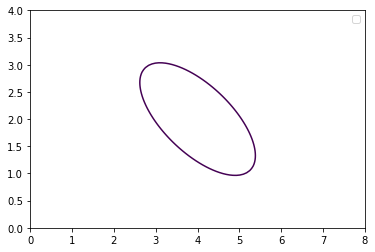

In [13]:
D = int(2)
x = np.random.rand(D)
mu = np.array([4,2],float)
cov = np.array([[1.44,-0.702],[-0.702,0.81]])
# random symmetric matrix
#cov = A.T.dot(A)

# Generate grid points
x, y = np.meshgrid(np.linspace(0,8,100),np.linspace(0,4,100))
xy = np.column_stack([x.flat, y.flat])

# density values at the grid points
z = mvn.pdf(xy, mu, cov).reshape(x.shape)

# arbitrary contour levels
contour_level = [0.1, 0.2, 0.3,0.9]

fig = plt.contour(x, y, z, levels = contour_level)
plt.legend()
plt.show()

In [8]:
x, y = np.meshgrid(np.linspace(0,2,5),np.linspace(0,1,5))
print(x)
print(y)

[[0.  0.5 1.  1.5 2. ]
 [0.  0.5 1.  1.5 2. ]
 [0.  0.5 1.  1.5 2. ]
 [0.  0.5 1.  1.5 2. ]
 [0.  0.5 1.  1.5 2. ]]
[[0.   0.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25 0.25]
 [0.5  0.5  0.5  0.5  0.5 ]
 [0.75 0.75 0.75 0.75 0.75]
 [1.   1.   1.   1.   1.  ]]
